In [2]:
import pandas as pd
import numpy as np

In [3]:
armstrong_data = []
prime_data = []
BASENAME = "V3_sub{}.xlsx"
ARMSTRONG_DIR = "./data/armstrong_dataset/"
PRIME_DIR = "./data/prime_dataset/"
NUM_SUBJECTS = 4

In [4]:
for sub in range(1,NUM_SUBJECTS+1):
    filename = ARMSTRONG_DIR + BASENAME.format(sub)
    armstrong_data.append(pd.read_excel(filename))
    filename = PRIME_DIR + BASENAME.format(sub)
    prime_data.append(pd.read_excel(filename))

In [5]:
#percent lines in sequence
def get_percent_lines_in_seq(data):
    data = np.array(data)
    count = 0
    last_line = 0
    total_lines = 0
    for line in data:
        if line[1]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            count += 1
        last_line = line[1]
    print(count, total_lines)
    return count, total_lines, count/total_lines

In [6]:
armstrong_perc_in_seq = []
prime_perc_in_seq = []
for sub in range(NUM_SUBJECTS):
    armstrong_perc_in_seq.append(get_percent_lines_in_seq(armstrong_data[sub]))
    prime_perc_in_seq.append(get_percent_lines_in_seq(prime_data[sub]))
print("Armstrong\nInSeq Total Percentage")
print(armstrong_perc_in_seq)
print("Prime\nInSeq Total Percentage")
print(prime_perc_in_seq)

199 746
106 390
128 645
57 212
85 283
137 364
85 283
155 498
Armstrong
InSeq Total Percentage
[(199, 746, 0.2667560321715818), (128, 645, 0.19844961240310077), (85, 283, 0.3003533568904594), (85, 283, 0.3003533568904594)]
Prime
InSeq Total Percentage
[(106, 390, 0.2717948717948718), (57, 212, 0.2688679245283019), (137, 364, 0.37637362637362637), (155, 498, 0.3112449799196787)]


In [7]:
def get_seq_map(data):
    data = np.array(data)
    counts = {}
    last_line = 0
    total_lines = 0
    for line in data:
        if line[0]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            if line[1] not in counts:
                counts[line[1]] = 0
            counts[line[1]] += 1
        last_line = line[1]
    return counts, total_lines

In [8]:
armstrong_seq_maps = []
prime_seq_maps = []
for sub in range(NUM_SUBJECTS):
    armstrong_seq_maps.append(get_seq_map(armstrong_data[sub]))
    prime_seq_maps.append(get_seq_map(prime_data[sub]))

In [9]:
LINES_ARMSTRONG = 32
LINES_PRIME = 41
armstrong_tok_analysis = []
prime_tok_analysis = []

for m, total in armstrong_seq_maps:
    armstrong_line_ct = np.zeros(LINES_ARMSTRONG)
    for k,v in m.items():
        armstrong_line_ct[k] = v/total
    armstrong_tok_analysis.append(armstrong_line_ct)
for m, total in prime_seq_maps:
    prime_line_ct = np.zeros(LINES_PRIME)
    for k,v in m.items():
        prime_line_ct[k] = v/total
    prime_tok_analysis.append(prime_line_ct)
armstrong_tok_analysis, prime_tok_analysis

([array([ 0.        ,  0.00158983,  0.00079491,  0.00238474,  0.00317965,
          0.        ,  0.        ,  0.00556439,  0.01192369,  0.00158983,
          0.00476948,  0.00397456,  0.01351351,  0.00476948,  0.        ,
          0.        ,  0.00238474,  0.0063593 ,  0.01589825,  0.01351351,
          0.        ,  0.00079491,  0.00079491,  0.        ,  0.00079491,
          0.00079491,  0.        ,  0.        ,  0.        ,  0.00079491,
          0.00476948,  0.00794913]),
  array([ 0.        ,  0.00642792,  0.00275482,  0.00367309,  0.00183655,
          0.        ,  0.        ,  0.00367309,  0.00642792,  0.00275482,
          0.00275482,  0.00826446,  0.00642792,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00091827,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00367309,  0.        ,  0.00091827,
          0.00091827,  0.00091827,  0.        ,  0.00918274,  0.01285583,
          0.00367309,  0.        ]),
  array([ 0.        ,  0.00606061,  0.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

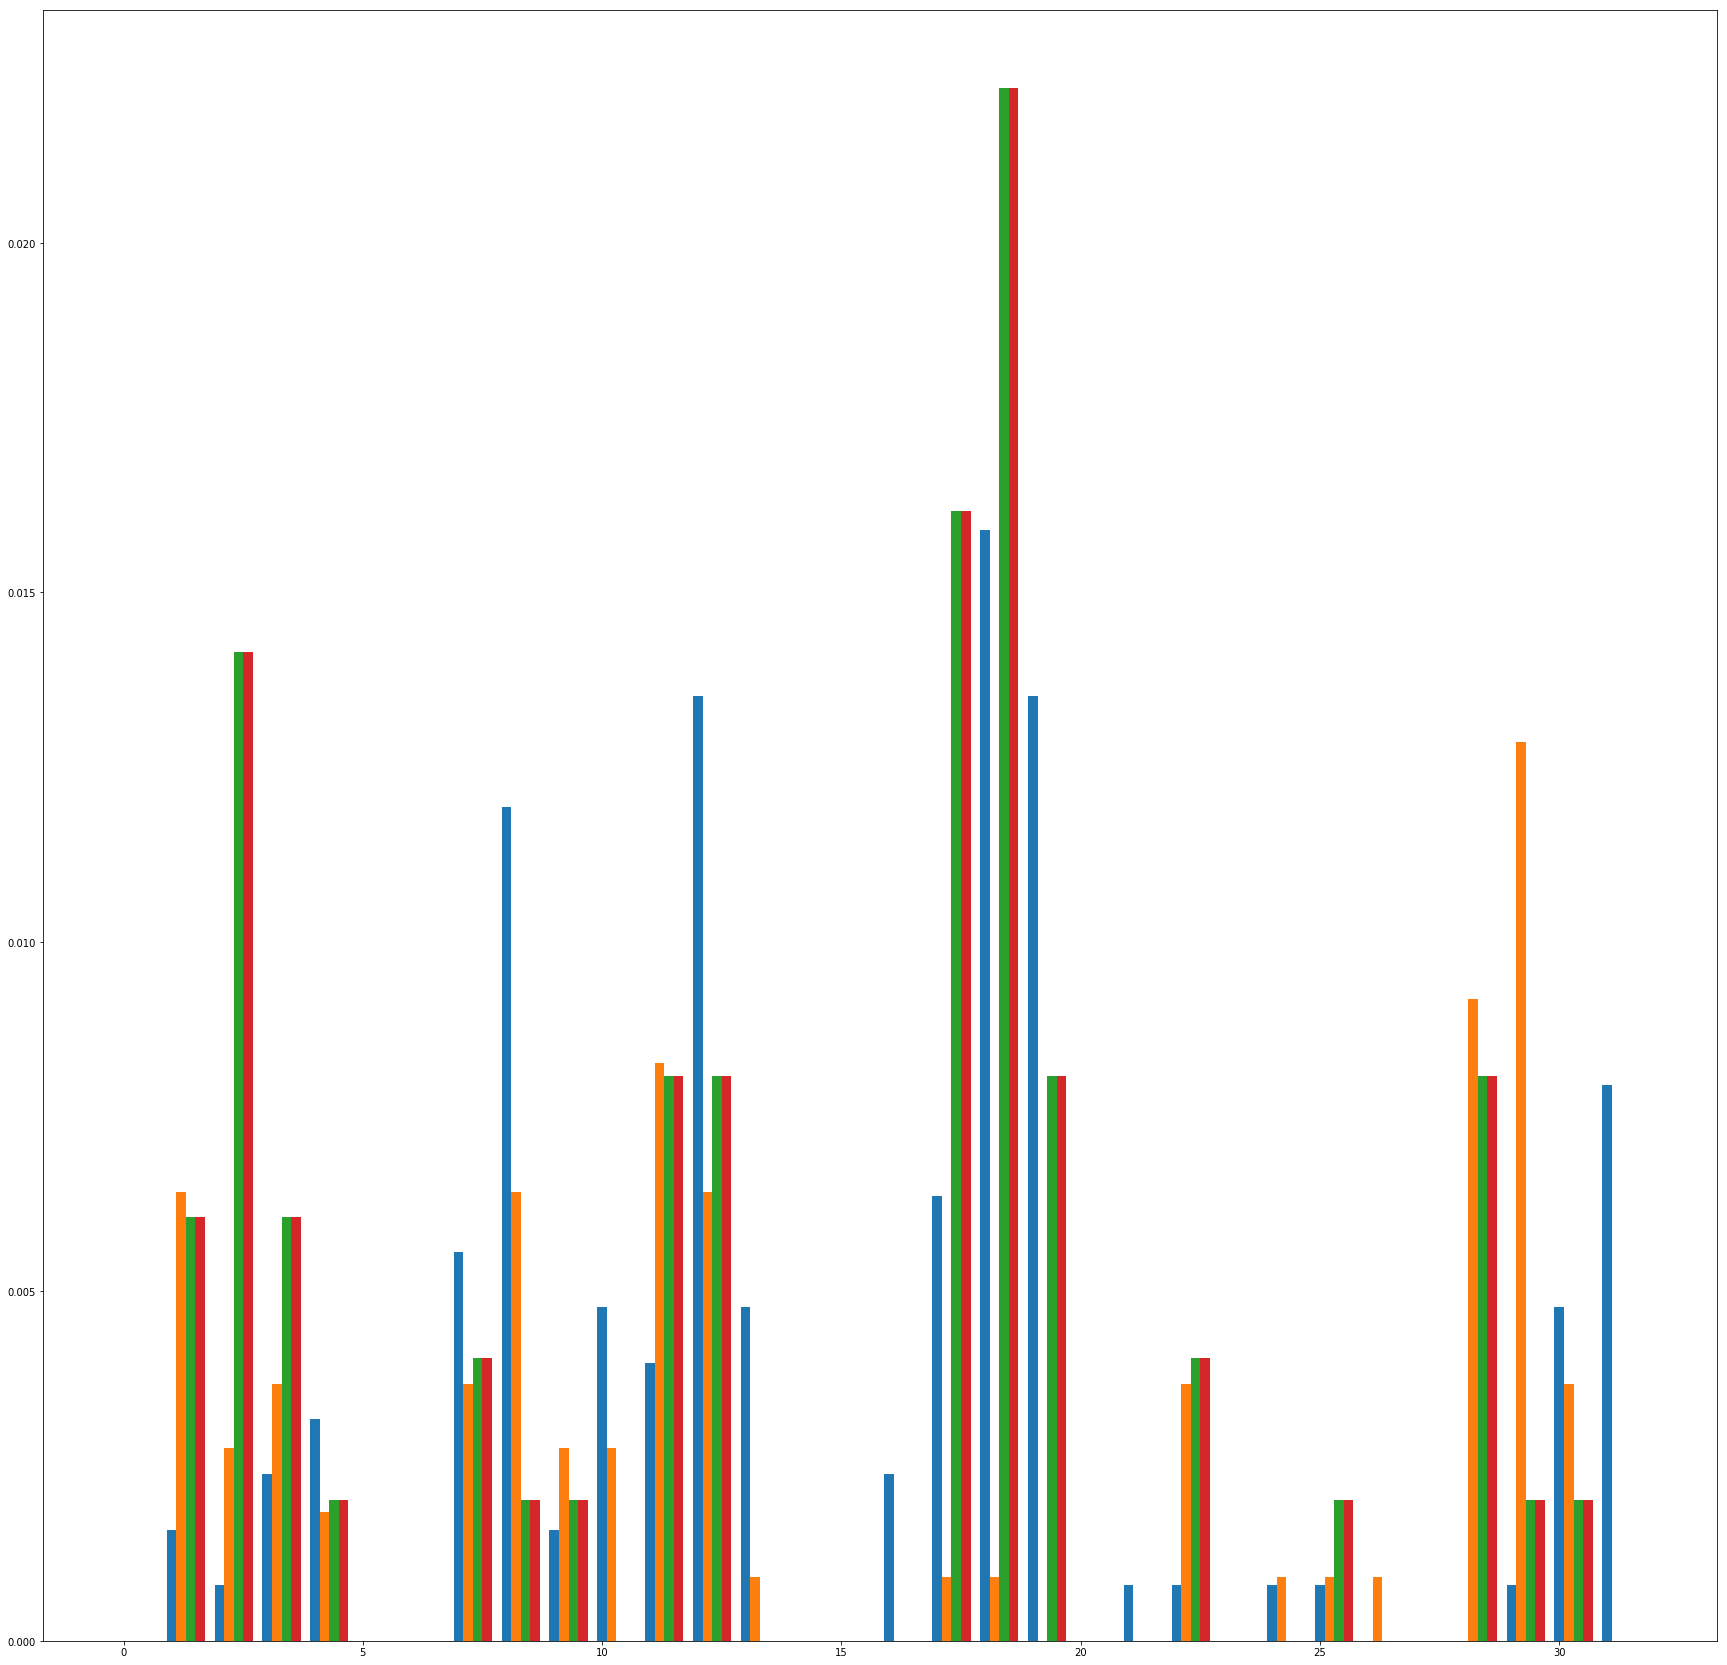

In [23]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.2,armstrong_tok_analysis[sub],width=0.2)

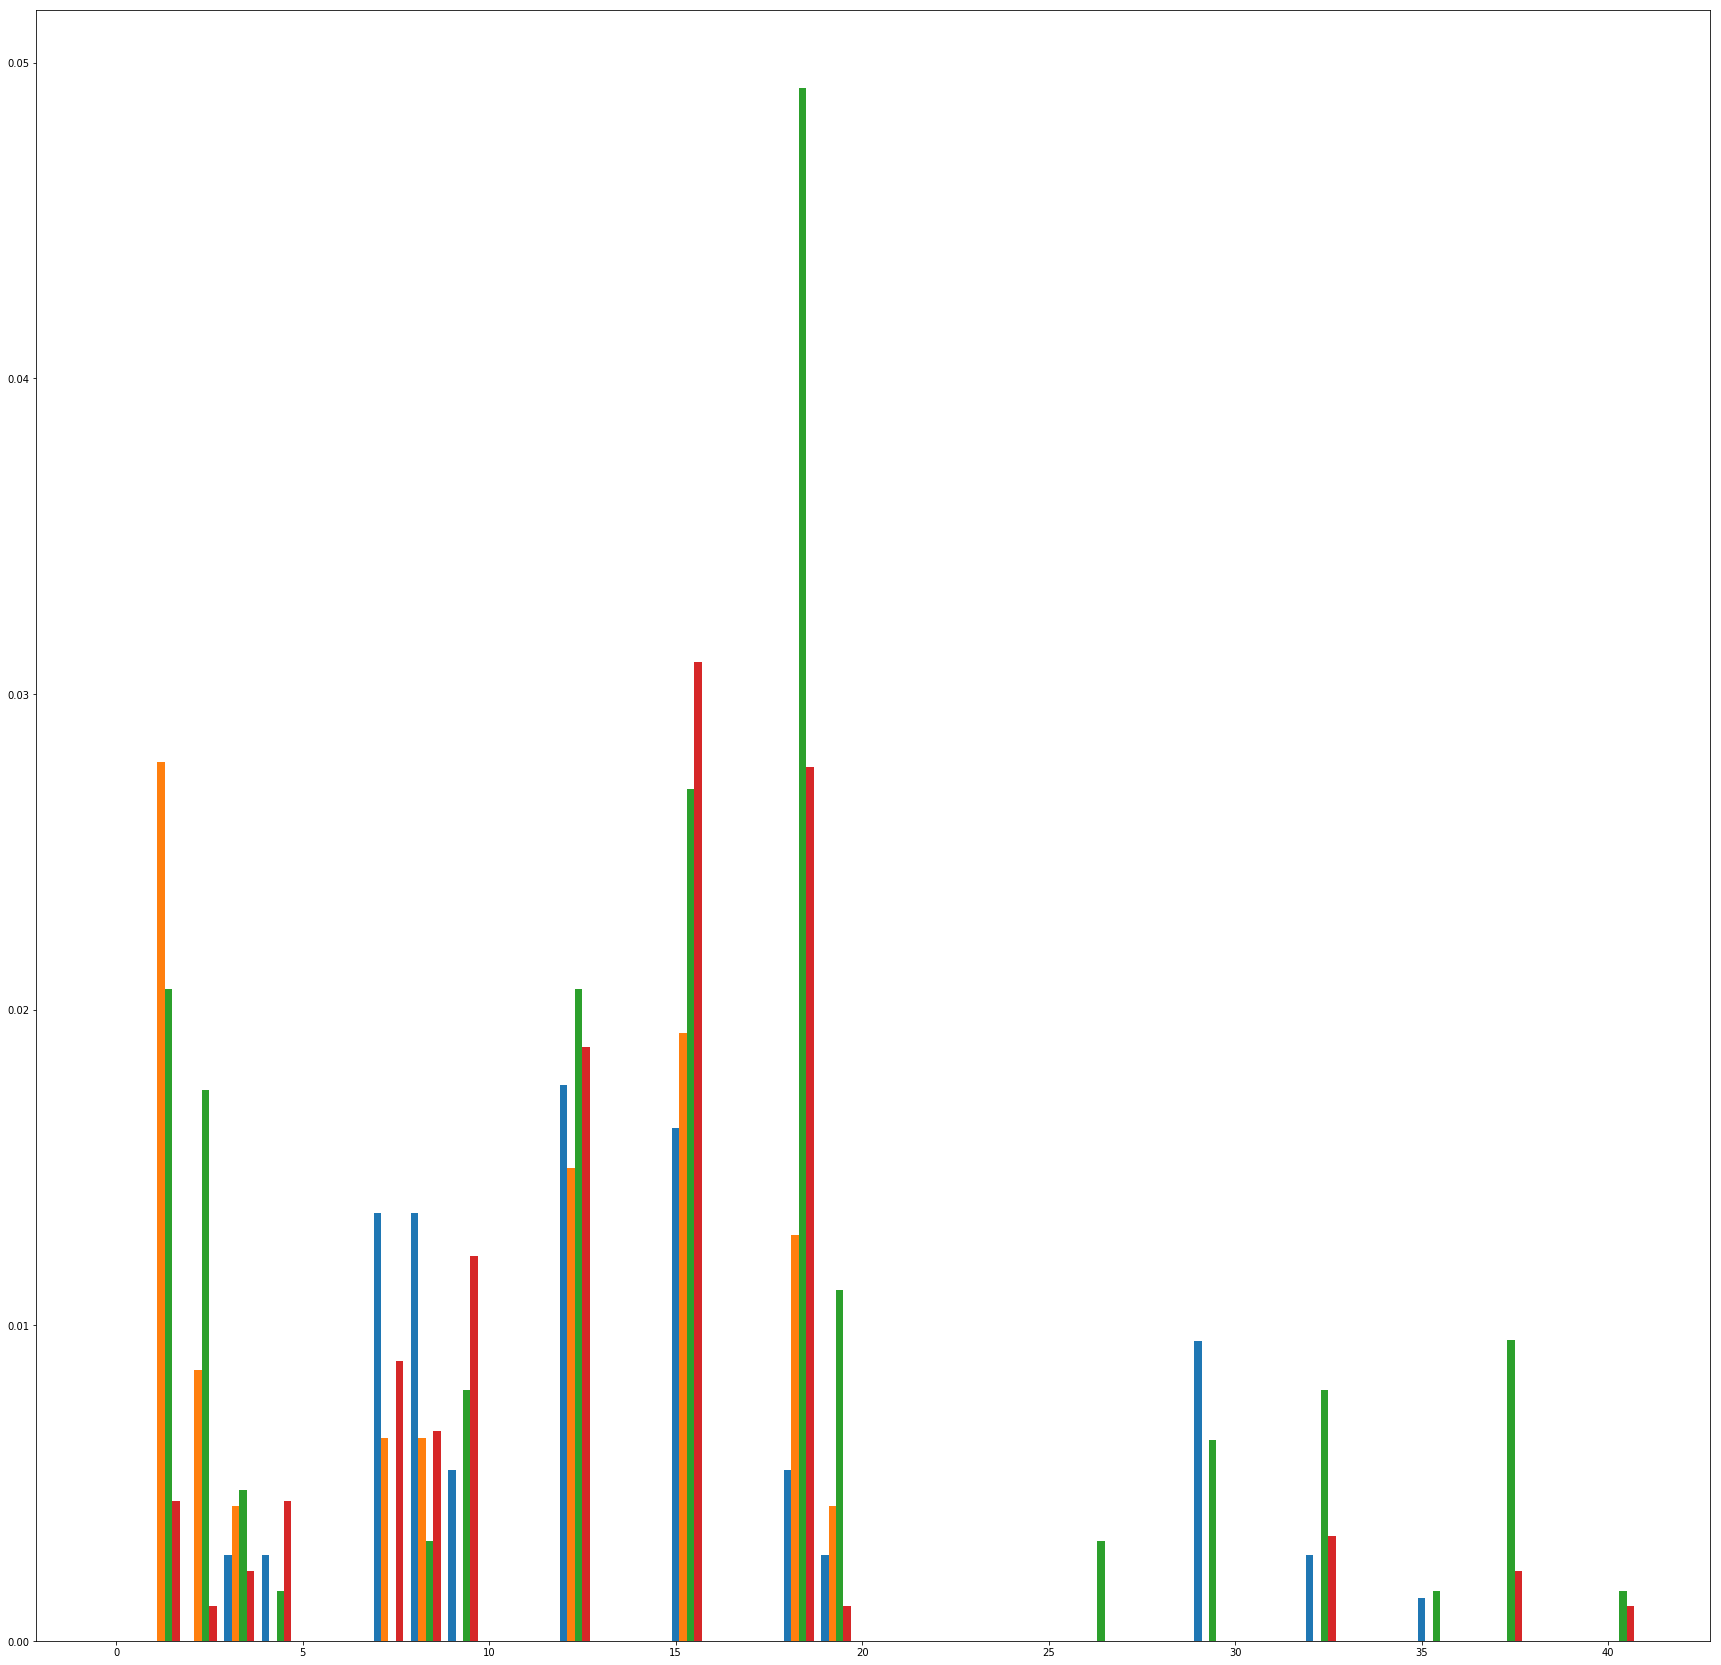

In [24]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_PRIME)+sub*0.2,prime_tok_analysis[sub],width=0.2)